In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from IPython.display import display
import sys
from statistics import mean

#sns.set(style='ticks') # makes longer tick marks
sns.set_context('poster') # makes text larger

In [2]:
# * Windows versus mac.
#folder = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample2/2019/08/09/'
folder = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample2\2019\08\09' 
file = 'PumpGU01Array01.00r0.5p3Array01.00r0.5p3Device1.2DrumGate113721' 
path = os.path.join(folder,file)
df = pd.read_csv(os.path.join(path, 'Demod1.csv'), skiprows = 2) 
#df.r = df.r/df.r.max() 
#print(df)  

df['rlog'] = np.log10(df.r) 
df['Freq MHz']=(df.frequency)/10**6
df['Freq MHz']= df['Freq MHz'].round(2)
df['DC Gate Voltage V'] = df['Keithley Voltage'].round(2)
p = df.pivot_table(index = 'DC Gate Voltage V', columns = 'Freq MHz', values = 'rlog').sort_index(axis = 0, ascending = False) 

In [3]:
# Ideally the dimensions of X and Y should be one greater than those of C; 
# if the dimensions are the same, then the last row and column of C will be ignored.

# create a listwrap that wraps around the list 
# This is what is needed for pcolormesh.
def listwrap(currentlist):
    listwrap = [0] * (len(currentlist)+1)
    for i in range(len(currentlist)):
        try:
            listwrap[i+1] = ((currentlist[i]+currentlist[i+1])/2)
        except IndexError:
            pass
    topstep = listwrap[2]-listwrap[1]
    listwrap[0]=listwrap[1]-topstep
    botstep = listwrap[-2]-listwrap[-3]
    listwrap[-1]=listwrap[-2]+botstep
    return listwrap

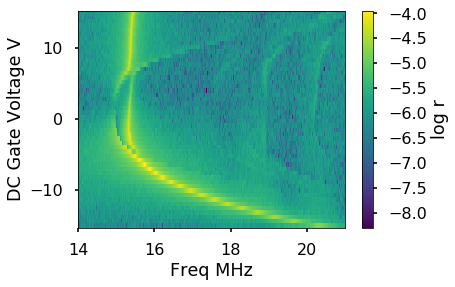

In [4]:
## pcolormesh makes a nice-looking graph.
## You can use the cmap argument to change the colors.
plt.pcolormesh( listwrap(p.columns),listwrap(p.index), p)
plt.xlabel(p.columns.name)
plt.ylabel(p.index.name)
cbar = plt.colorbar(drawedges=False)
cbar.set_label('log r')

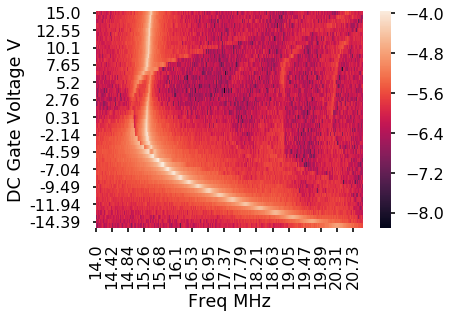

In [5]:
sns.heatmap(p)